In [1]:
# data
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs, make_moons

#model
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# visualization
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

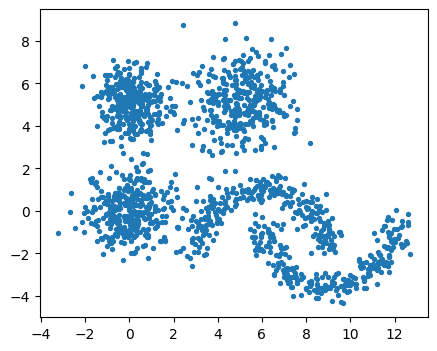

In [2]:
# data generation
X, y = make_blobs(n_samples=1000, centers=[[0, 0], [0, 5], [5, 5]], cluster_std=[1.0, 0.8, 1.2], random_state=42)
moons = 3*make_moons(n_samples=500, noise=0.12, random_state=42)[0] + np.array([6, -2])

X = np.concatenate((X, moons), axis=0)

plt.figure(figsize=(5, 4))
plt.scatter(X[:,0], X[:,1], s=8)
plt.show()

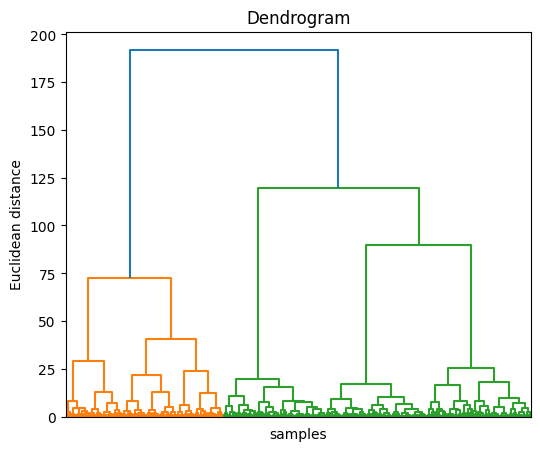

In [3]:
plt.figure(figsize =(6, 5))
plt.title('Dendrogram')
plt.xlabel("samples")
plt.ylabel("Euclidean distance")

dendrogram = shc.dendrogram(shc.linkage(y=X, metric='euclidean', method='ward'), no_labels=True)

In [4]:
silhouette_scores = {}

n_clusters_values = range(2, 8)
linkages = ['ward', 'average', 'complete', 'single']

for n in n_clusters_values:
    for linkage in linkages:
        cluster_labels = AgglomerativeClustering(n_clusters=n,
                                                 metric='euclidean',
                                                 linkage=linkage).fit_predict(X)
        silhouette_score_avg = silhouette_score(X, cluster_labels)
        silhouette_scores[silhouette_score_avg] = [n, linkage]

In [5]:
silhouette_scores

{0.45631742884278187: [2, 'ward'],
 0.4748797764985605: [2, 'average'],
 0.4826942614210288: [2, 'complete'],
 0.12541825187517716: [2, 'single'],
 0.4799218020492185: [3, 'ward'],
 0.502106899631831: [3, 'average'],
 0.4567831567677907: [3, 'complete'],
 0.047438785708246334: [3, 'single'],
 0.5415728985788221: [4, 'ward'],
 0.5606175076686885: [4, 'average'],
 0.5243193439873743: [4, 'complete'],
 0.04812342631680935: [4, 'single'],
 0.5349662547910249: [5, 'ward'],
 0.5222370845754504: [5, 'average'],
 0.4630346364646886: [5, 'complete'],
 -0.16849938336218642: [5, 'single'],
 0.5219530418287236: [6, 'ward'],
 0.5189419667875488: [6, 'average'],
 0.4236597749916256: [6, 'complete'],
 -0.3591126256941897: [6, 'single'],
 0.49878342938205894: [7, 'ward'],
 0.4870348543501344: [7, 'average'],
 0.3583208044219282: [7, 'complete'],
 -0.3598163944613206: [7, 'single']}

In [6]:
# pick up the params that maximizes averaged silhouette_score.
#max_key = max(silhouette_scores.keys())
#best_setting = silhouette_scores[max_key]
#print(f"highest silhouette_score_avg {round(max_key, 5)} got with n={best_setting[0]} and linkage='{best_setting[1]}'")

In [7]:
# picking the top 3 settings with highest averaged silhouette_scores.
scores = list(silhouette_scores.keys())
scores.sort(reverse=True)
top_scores = scores[0:3]

top_settings = [silhouette_scores[score] for score in top_scores]

# print top 3 settings
for score in top_scores:
    print(f"silhouette_scores_avg={round(score, 5)} with n={silhouette_scores[score][0]} and linkage='{silhouette_scores[score][1]}'")

silhouette_scores_avg=0.56062 with n=4 and linkage='average'
silhouette_scores_avg=0.54157 with n=4 and linkage='ward'
silhouette_scores_avg=0.53497 with n=5 and linkage='ward'


In [8]:
def plot(n, linkage):
    """
    :param n: number of clusters
    :param linkage: determines which distance to use between sets of observation
    :return: None
    """
    clusters = AgglomerativeClustering(n_clusters=n,
                                       metric='euclidean',
                                       linkage=linkage).fit_predict(X)

    colors=['salmon', 'darkturquoise', 'gold', 'seagreen', 'purple']
    point_color=[]

    for row in clusters:
        point_color.append(colors[row])

    plt.figure(figsize=(5, 4))
    plt.scatter(X[:, 0], X[:, 1], c=point_color, s=8)
    plt.show()

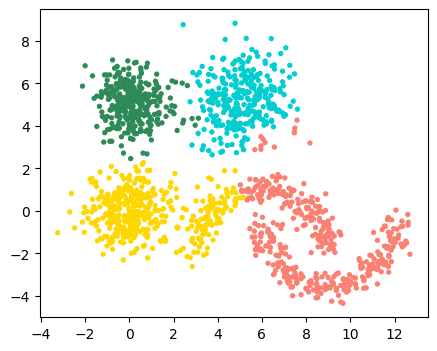

In [9]:
plot(n=4, linkage='average')

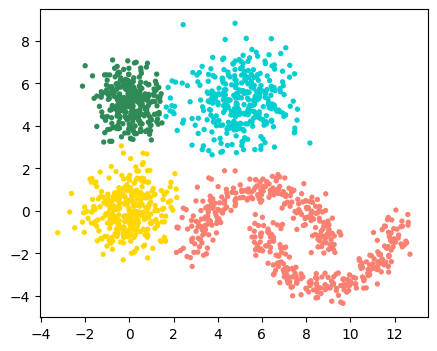

In [10]:
plot(n=4, linkage='ward')

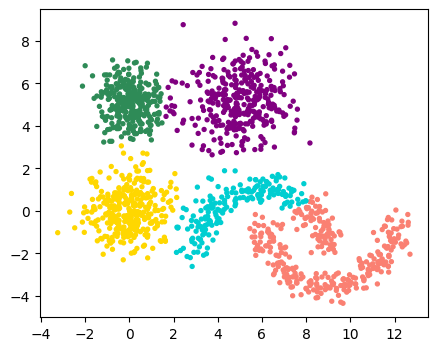

In [11]:
plot(n=5, linkage='ward')

As observed, using the averaged silhouette_score as metric to maximize, the clustering obtained for the top 3 are not as good as expected. Another clustering approaches (such as K-Means and DBSCAN) works better. Finally, the Hierarchical Clustering approach, in the same way as K-Means, classifies all samples in clusters, unlike DBSCAN that is sensitive to noise/outliers, rejecting them.